DATA PREPROCESSING FOR NSL-KDD DATASET

In [98]:
# Import Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import torch.nn.init as init

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [100]:
# Load the dataset
df = pd.read_csv('/kaggle/input/nslkdd/KDDTrain+.txt')
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Checking if there are any NaN values. As we can see no NaN values were find so we can proceed further without any changes here.

In [102]:
df.isnull().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
20          0
dtype: int64

In [104]:
# Checking the overall distribution of given dataset.
# As we can see the distribution is very randomly distributed
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


/tmp/ipykernel_24/3560334815.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], fill=True)


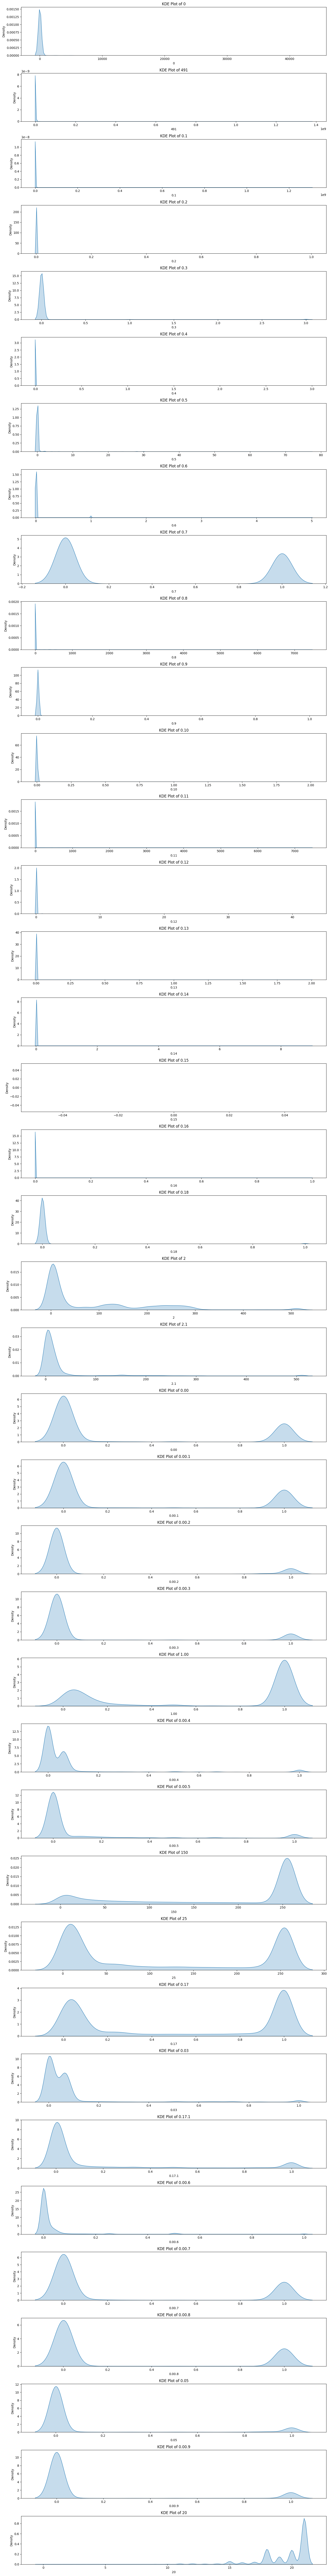

In [106]:
# To further check the specific distributions of the given dataset I am drawing the KDE plots of each column.
# From the drawn plots we observe that the distributions are very skewed. There is not a single column which has a normal distribution.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numeric_columns) * 3))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [108]:
# Checking If any column has negative values. It turns out no column has negative values.
has_negative_values = (df[numeric_columns] < 0).any().any()

print("Does any column have negative values?", has_negative_values)

Does any column have negative values? False


In [110]:
print(df.columns.tolist())

['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal', '20']


In [112]:
# From the drawn plot I distribute the columns into right skewed and left skewed column.
# I have include columns with both right and left skewness into right skewed columns list.
# For the right skewed data I apply log+1 transform to normalise it.
# For the left skewed data I apply square transform to normalise it.
# I tried using box-cox and yeo-johnson transforms to these data but found that their results werent as good as the loga and square ones.
# So I just sticked to the above two basic transforms.
right_skewed = ['0', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3','0.00.4', '0.00.5', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9']
left_skewed = ['20','150','1.00']

for col in right_skewed:
    if col in df.columns:
        df[col] = np.log1p(df[col])

for col in left_skewed:
    if col in df.columns:
        df[col] = df[col] ** 2

/tmp/ipykernel_24/4197326746.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], fill=True)


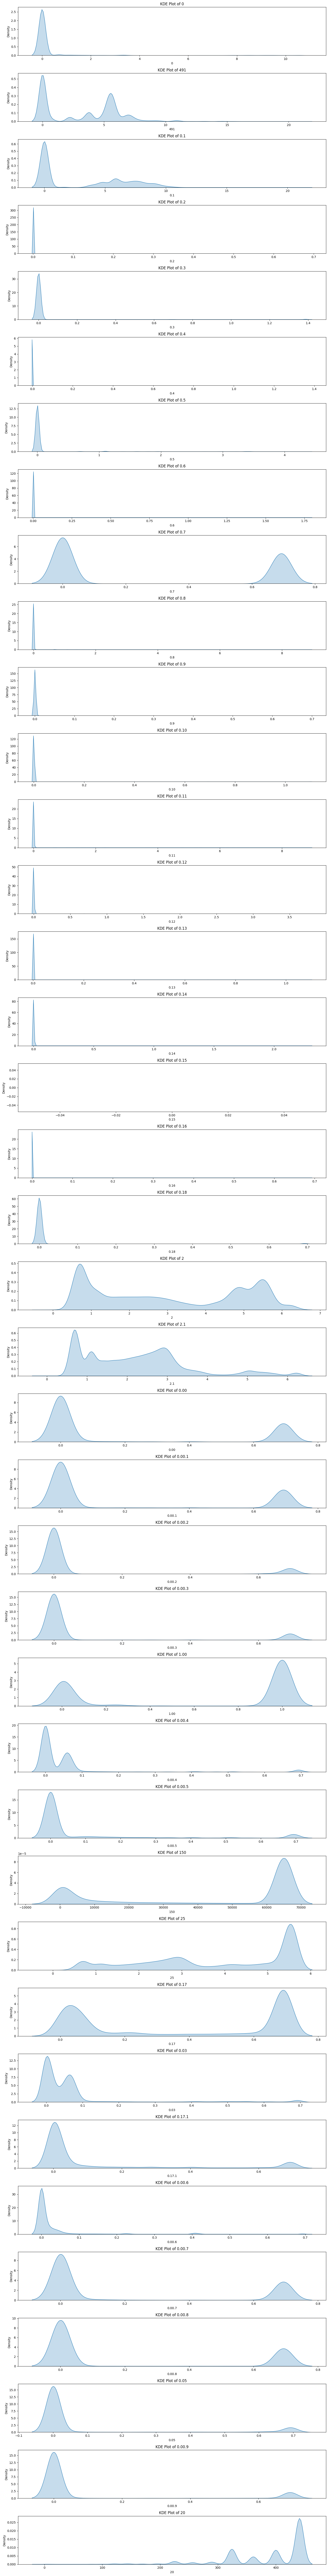

In [114]:
# Drawing KDE plots for each column again we observe that though it has not completely returned to normal distributions the skewness has reduced.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = df.select_dtypes(include=['number']).columns


plt.figure(figsize=(15, len(numeric_columns) * 3))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1) 
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [116]:
# Checking the different unique values of 0.15 column only to see that all its values are 0.
df["0.15"].unique()

array([0.])

In [118]:
# Since 0.15 column is a uniform distribution of 0.00 I am dropping it.
df = df.drop('0.15',axis = 1)

In [120]:
df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03', '0.17.1',
       '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal', '20'],
      dtype='object')

In [122]:
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0.000000,udp,other,SF,4.990433,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.470004,0.631272,0.000000,0.000000,0.000000,0.000000,0.000000,normal,225
1,0.000000,tcp,private,S0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.095310,0.048790,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,neptune,361
2,0.000000,tcp,http,SF,5.451038,9.006264,0.0,0.0,0.0,0.0,...,0.693147,0.000000,0.029559,0.039221,0.029559,0.009950,0.000000,0.009950,normal,441
3,0.000000,tcp,http,SF,5.298317,6.042633,0.0,0.0,0.0,0.0,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal,441
4,0.000000,tcp,private,REJ,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.067659,0.067659,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,neptune,441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.000000,tcp,private,S0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.095310,0.058269,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,neptune,400
125968,2.197225,udp,private,SF,4.663439,4.983607,0.0,0.0,0.0,0.0,...,0.672944,0.009950,0.009950,0.000000,0.000000,0.000000,0.000000,0.000000,normal,441
125969,0.000000,tcp,smtp,SF,7.710653,5.953243,0.0,0.0,0.0,0.0,...,0.113329,0.058269,0.000000,0.000000,0.542324,0.000000,0.009950,0.000000,normal,324
125970,0.000000,tcp,klogin,S0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.029559,0.048790,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,neptune,400


In [124]:
# Differentiating the dataframe into features and labels.
features = df.drop('normal',axis = 1)
labels = df['normal']

In [126]:
# Dealing with categorical variables by using dummy variables.
categorical = ['tcp','ftp_data','SF']
dummies = pd.get_dummies(features[categorical], drop_first=True,dtype=int)
features_encoded = features.drop(columns=categorical).join(dummies)
features_encoded

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,SF_REJ,SF_RSTO,SF_RSTOS0,SF_RSTR,SF_S0,SF_S1,SF_S2,SF_S3,SF_SF,SF_SH
0,0.000000,4.990433,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.000000,5.451038,9.006264,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,5.298317,6.042633,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
125968,2.197225,4.663439,4.983607,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
125969,0.000000,7.710653,5.953243,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,...,0,0,0,0,0,0,0,0,1,0
125970,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0


In [128]:
features_encoded.shape

(125972, 119)

In [130]:
# Using z-score normalisation to normalise all values.
z_score_scaler = StandardScaler()
features_z_score = pd.DataFrame(z_score_scaler.fit_transform(features_encoded[numeric_columns.drop('0.15')]), columns=numeric_columns.drop('0.15'))
features_encoded[numeric_columns.drop('0.15')] = features_z_score

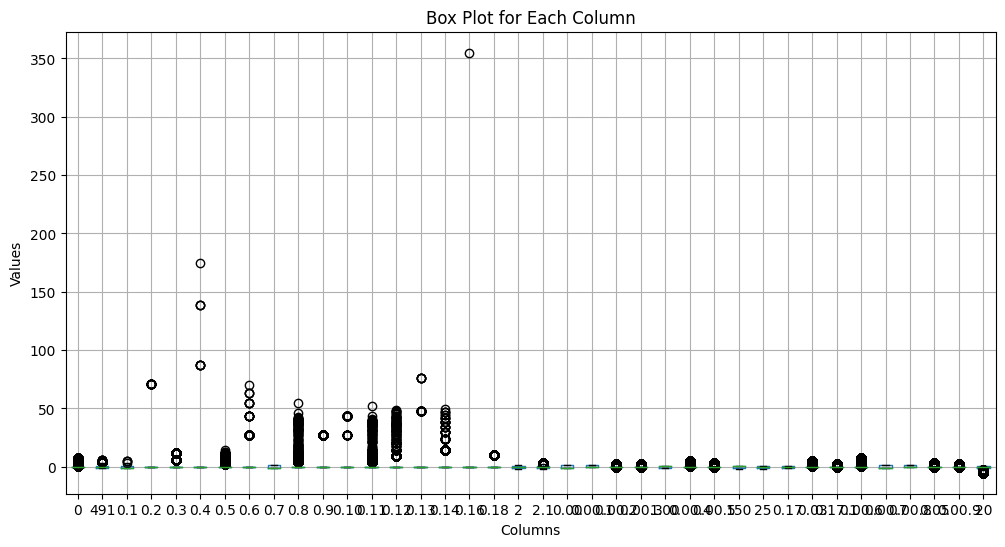

In [132]:
# Drawing boxplots for all columns to check the outliers.
# It is found that there are many outliers.
plt.figure(figsize=(12, 6))
features_encoded[numeric_columns.drop('0.15')].boxplot()

plt.title('Box Plot for Each Column')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.grid(True)
plt.show()

In [134]:
# Using z-score method r-score method to remove the outliers.
threshold = 3
mask = (np.abs(z_score_scaler.fit_transform(features_encoded[numeric_columns.drop('0.15')])) < threshold).all(axis=1)
features_encoded = features_encoded[mask]
labels = labels[mask]

print("Filtered Features:")
print(features_encoded)
print("\nFiltered Labels:")
print(labels)

Filtered Features:
               0       491       0.1       0.2       0.3       0.4       0.5  \
0      -0.221618  0.590437 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   
1      -0.221618 -1.082982 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   
2      -0.221618  0.744889  1.668633 -0.014089 -0.091298 -0.008145 -0.127866   
3      -0.221618  0.693678  0.833553 -0.014089 -0.091298 -0.008145 -0.127866   
4      -0.221618 -1.082982 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   
...          ...       ...       ...       ...       ...       ...       ...   
125967 -0.221618 -1.082982 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   
125968  1.292270  0.480787  0.535144 -0.014089 -0.091298 -0.008145 -0.127866   
125969 -0.221618  1.502595  0.808365 -0.014089 -0.091298 -0.008145 -0.127866   
125970 -0.221618 -1.082982 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   
125971 -0.221618  0.601653 -0.869117 -0.014089 -0.091298 -0.008145 -0.127866   

             0.6    

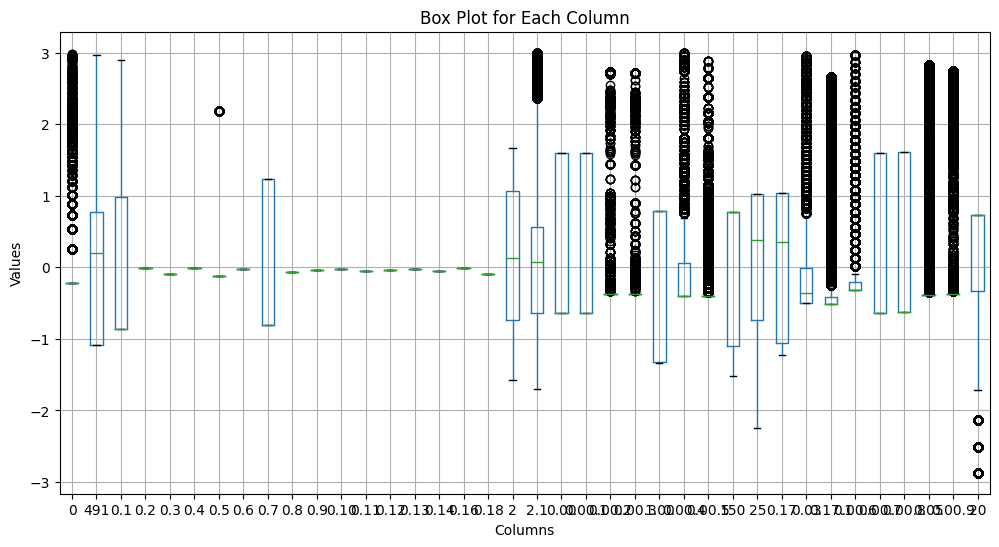

In [136]:
# Drawing boxplot for all columns again to check if outliers are removed.
plt.figure(figsize=(12, 6))
features_encoded[numeric_columns.drop('0.15')].boxplot()

plt.title('Box Plot for Each Column')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.grid(True)
plt.show()

In [138]:
features_encoded

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,SF_REJ,SF_RSTO,SF_RSTOS0,SF_RSTR,SF_S0,SF_S1,SF_S2,SF_S3,SF_SF,SF_SH
0,-0.221618,0.590437,-0.869117,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,0,0,0,0,0,0,0,0,1,0
1,-0.221618,-1.082982,-0.869117,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,0,0,0,0,1,0,0,0,0,0
2,-0.221618,0.744889,1.668633,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,1.235686,-0.070059,...,0,0,0,0,0,0,0,0,1,0
3,-0.221618,0.693678,0.833553,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,1.235686,-0.070059,...,0,0,0,0,0,0,0,0,1,0
4,-0.221618,-1.082982,-0.869117,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,-0.221618,-1.082982,-0.869117,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,0,0,0,0,1,0,0,0,0,0
125968,1.292270,0.480787,0.535144,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,0,0,0,0,0,0,0,0,1,0
125969,-0.221618,1.502595,0.808365,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,1.235686,-0.070059,...,0,0,0,0,0,0,0,0,1,0
125970,-0.221618,-1.082982,-0.869117,-0.014089,-0.091298,-0.008145,-0.127866,-0.029841,-0.809267,-0.070059,...,0,0,0,0,1,0,0,0,0,0


Number of components needed to reach 99.0% explained variance: 37


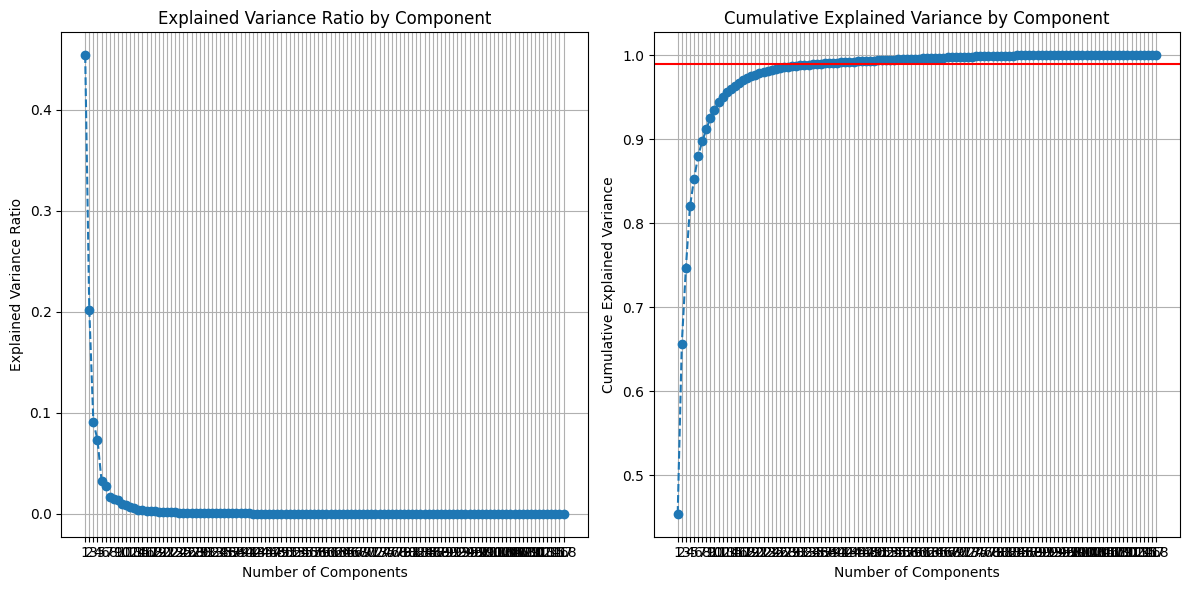

In [140]:
# Using SVD decomposition to do feature extraction.
# I first fit the dataframe for maximum number of components and then checked cumulative explained variance for each component added in descending order of explained variance contribution.
# I observe that the first 37 components are enough to explain 99% of the variance of the dataset.
n_components = min(features_encoded.shape) - 1
svd = TruncatedSVD(n_components=n_components)
svd.fit(features_encoded)

singular_values = svd.singular_values_
explained_variance_ratio = (singular_values ** 2) / np.sum(singular_values ** 2)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
threshold = 0.99
num_components_99 = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components needed to reach {threshold * 100}% explained variance: {num_components_99}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Component')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, n_components + 1))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, n_components + 1))
plt.grid()

plt.tight_layout()
plt.show()

In [142]:
# I now use Truncated SVD to get the nearest rank 37 matrix for my dataset.
n_components = 37
svd = TruncatedSVD(n_components=n_components)
decomposed_features = svd.fit_transform(features_encoded)
final_features = pd.DataFrame(decomposed_features)
final_features

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.910696,0.883285,-1.958405,-0.268948,2.673399,3.315288,0.890441,0.986178,-0.343661,1.010674,...,0.006102,0.144685,0.503738,-0.124210,-0.060700,0.054860,-0.057922,-0.051754,-0.019283,-0.116257
1,4.117921,-1.520480,1.050823,-0.152579,0.326246,-0.024034,-0.424114,-0.050463,-0.180274,-0.008315,...,-0.000522,0.016140,-0.043379,-0.018214,-0.003033,-0.013780,0.010367,0.005485,0.001329,0.019096
2,-2.867964,-1.575033,1.644110,-1.016723,0.103149,-0.761632,0.075490,0.367582,0.173219,-0.348715,...,0.023382,0.007586,-0.031056,0.041983,-0.040518,0.097582,-0.151966,-0.055660,-0.033624,-0.043365
3,-2.427250,-1.339788,1.851215,1.207643,-0.510509,0.451727,0.201604,-0.184270,-0.554071,0.108592,...,-0.006278,-0.002697,0.056601,0.000979,0.008276,-0.015239,0.017969,0.015849,0.010648,0.016533
4,1.467872,5.503133,2.971053,0.859649,-0.248423,0.079766,0.522990,-0.529785,0.206775,0.013194,...,0.031435,0.032442,-0.009551,0.039571,-0.004626,0.006066,-0.008411,0.012068,-0.004664,0.018539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100605,4.120134,-1.625470,1.250223,0.524858,0.188827,-0.369917,0.136285,-0.318999,-0.056462,-0.016958,...,-0.012386,-0.008115,-0.016169,-0.009471,-0.001072,-0.003162,0.011730,0.001097,-0.005260,0.021952
100606,-1.904419,-0.661594,0.425694,0.295775,0.230109,1.187464,-1.552152,-1.311806,1.086014,-0.395234,...,-0.070751,0.034749,0.226107,-0.252453,-0.055126,0.144277,-0.207257,-0.070031,-0.031630,-0.036955
100607,-1.301789,-1.042207,0.637603,-1.159626,0.010468,2.392748,-0.527183,1.362486,-0.222574,-0.186457,...,-0.263855,-0.342805,0.369031,0.663147,-0.068434,0.206261,-0.185276,-0.040267,-0.027268,0.055891
100608,4.259936,-1.476291,1.042775,-0.186973,0.133845,0.047879,-0.000893,-0.042272,0.017596,-0.023469,...,-0.019052,-0.018826,-0.025858,-0.025917,-0.011124,-0.011251,-0.023460,-0.032426,-0.028553,-0.005244


In [144]:
# Final Description of the processed Dataset.
final_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,...,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000,100610.000000
mean,0.203967,-0.526026,1.187876,0.073546,0.343455,0.109038,-0.034111,0.015789,0.025125,0.044002,...,0.001477,0.000338,-0.002015,-0.000403,-0.000515,0.001157,-0.002046,-0.000801,-0.000538,-0.000649
std,3.135451,2.028661,0.746725,1.262213,0.769780,0.768478,0.609203,0.561851,0.542866,0.451925,...,0.120498,0.118507,0.106054,0.097877,0.091624,0.090442,0.086984,0.085311,0.083654,0.082723
min,-3.839478,-2.181652,-2.036426,-2.576559,-1.505397,-3.138206,-3.036178,-2.250758,-2.836714,-0.826180,...,-0.556034,-0.725073,-0.683822,-1.203686,-0.614033,-0.561767,-0.639418,-0.428550,-0.456934,-0.354356
25%,-2.760452,-1.442502,0.775117,-0.713736,-0.019770,-0.305692,-0.357215,-0.347078,-0.335672,-0.264570,...,-0.018309,-0.023318,-0.038822,-0.031714,-0.009884,-0.022685,-0.023421,-0.012973,-0.009541,-0.017759
50%,-1.255983,-1.316524,1.190837,-0.063378,0.180089,0.047293,0.046581,0.013898,0.059730,-0.021221,...,-0.002586,-0.005977,-0.009064,-0.001548,-0.000196,-0.005316,0.000824,0.000529,0.000779,0.002310
75%,4.146964,-0.768589,1.654473,0.458064,0.476420,0.537812,0.346703,0.371773,0.293040,0.123967,...,0.012532,0.020702,0.018227,0.023013,0.005699,0.006487,0.021073,0.011244,0.008057,0.013064
max,4.701268,6.480881,3.379047,4.241923,4.385170,3.537259,3.132087,3.766773,2.892241,3.060290,...,1.170378,1.147985,0.888017,1.275942,0.833027,0.788802,0.697483,0.816629,0.791645,0.838827


In [146]:
def map_types_to_numbers(series, types):
    type_to_number = {type_name: i for i, type_name in enumerate(types)}
    mapped_series = series.map(type_to_number)
    return mapped_series.values, type_to_number

types = ['normal', 'neptune', 'warezclient', 'portsweep', 'smurf', 
         'satan', 'ipsweep', 'nmap', 'imap', 'back', 
         'multihop', 'warezmaster']

mapped_result, mapping = map_types_to_numbers(pd.Series(labels), types)

In [148]:
class CustomDataset(Dataset):
    def __init__(self, Features, Labels):
        self.features = Features
        self.labels = Labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        features = torch.tensor(self.features.iloc[idx, :], dtype=torch.float32)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        return features, labels

dataset = CustomDataset(final_features, mapped_result)

In [150]:
train_ratio = 0.8
test_ratio = 0.2

total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [152]:
class TensorDataset(Dataset):
    def __init__(self, Features, Labels):
        self.features = Features
        self.labels = Labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        features = self.features[idx]
        labels = self.labels[idx]
        return features, labels

In [154]:
class ContractiveAutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, contraction_penalty=1e-4):
        super(ContractiveAutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)
        self.contraction_penalty = contraction_penalty
        nn.init.xavier_uniform_(self.encoder.weight)
        nn.init.xavier_uniform_(self.decoder.weight)

    def forward(self, x):
        h = torch.sigmoid(self.encoder(x))
        x_reconstructed = self.decoder(h)
        return h, x_reconstructed

    def loss_function(self, x, x_reconstructed, h):
        mse_loss = F.mse_loss(x_reconstructed, x, reduction="mean")
        
        jacobian = torch.autograd.grad(
            outputs=h.sum(), 
            inputs=x,
            grad_outputs=torch.ones_like(h.sum()),
            retain_graph=True,
            create_graph=True
        )[0]
    
        jacobian_norm = torch.sum(jacobian ** 2)
        
        return mse_loss + self.contraction_penalty * jacobian_norm

In [156]:
class GatedConvolution(nn.Module):
    def __init__(self, input_dim, output_dim, kernel_size=3):
        super(GatedConvolution, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, output_dim, kernel_size, padding=1, stride=1)
        self.conv2 = nn.Conv1d(input_dim, output_dim, kernel_size, padding=1, stride=1)
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.xavier_uniform_(self.conv2.weight)

    def forward(self, x):
        A = self.conv1(x)
        B = torch.sigmoid(self.conv2(x))
        return A * B

In [157]:
class SCAE_GC(nn.Module):
    def __init__(self, input_dim, cae1, cae2, cae3, gc_input_dim, gc_output_dim):
        super(SCAE_GC, self).__init__()
        self.cae1 = cae1
        self.cae2 = cae2
        self.cae3 = cae3
        self.gated_conv = GatedConvolution(gc_input_dim, gc_output_dim)
        self.classifier = nn.Linear(20, 12)

    def forward(self, x):
        x, _ = self.cae1(x)
        x, _ = self.cae2(x)
        x, _ = self.cae3(x)

        x = x.unsqueeze(2)
        
        x = self.gated_conv(x)
        
        x = x.view(x.size(0), -1)

        x = self.classifier(x)
        x = torch.softmax(x, dim=1)
        
        return x

In [158]:
CAE1 = ContractiveAutoEncoder(37, 80)
CAE2 = ContractiveAutoEncoder(80, 40)
CAE3 = ContractiveAutoEncoder(40, 20)

In [159]:
def train_cae(cae, train_loader, num_epochs, learning_rate = 0.0001, device = 'cuda'):
    cae = cae.to(device)
    optimizer = torch.optim.Adam(cae.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        running_loss = 0
        cae.train()
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False):
            inputs, _ = batch
            inputs = inputs.to(device)
            inputs.requires_grad_(True)
            optimizer.zero_grad()
            h, x_reconstructed = cae(inputs)
            loss = cae.loss_function(inputs, x_reconstructed, h)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")
    return cae

In [160]:
trained_cae1 = train_cae(CAE1, train_loader, 10, 0.001, 'cpu')

Epoch 1/10, Loss: 0.0394


Epoch 2/10, Loss: 0.0013


Epoch 3/10, Loss: 0.0006


Epoch 4/10, Loss: 0.0003


Epoch 5/10, Loss: 0.0002


Epoch 6/10, Loss: 0.0002


Epoch 7/10, Loss: 0.0001


Epoch 8/10, Loss: 0.0001


Epoch 9/10, Loss: 0.0001


Epoch 10/10, Loss: 0.0001


In [161]:
def create_dataset(cae, train_loader, device):
    cae.eval()
    features_list = []
    labels_list = []
    
    with torch.no_grad():
        for feature_batch, label_batch in train_loader:
            feature_batch, label_batch = feature_batch.to(device), label_batch.to(device)
            h,_ = cae(feature_batch)
            features_list.append(h.cpu())
            labels_list.append(label_batch.cpu())
    
    features_tensor = torch.cat(features_list)
    labels_tensor = torch.cat(labels_list)
    
    dataset = TensorDataset(features_tensor, labels_tensor)
    data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    return data_loader

In [162]:
data_loader = create_dataset(trained_cae1, train_loader, 'cpu')

In [163]:
trained_cae2 = train_cae(CAE2, data_loader, 10, 0.001, 'cpu')

Epoch 1/10, Loss: 0.0087


Epoch 2/10, Loss: 0.0014


Epoch 3/10, Loss: 0.0006


Epoch 4/10, Loss: 0.0003


Epoch 5/10, Loss: 0.0001


Epoch 6/10, Loss: 0.0001


Epoch 7/10, Loss: 0.0000


Epoch 8/10, Loss: 0.0000


Epoch 9/10, Loss: 0.0000


Epoch 10/10, Loss: 0.0000


In [164]:
data_loader1 = create_dataset(trained_cae2, data_loader, 'cpu')

In [165]:
trained_cae3 = train_cae(CAE3, data_loader1, 10, 0.001, 'cpu')

Epoch 1/10, Loss: 0.0062


Epoch 2/10, Loss: 0.0017


Epoch 3/10, Loss: 0.0010


Epoch 4/10, Loss: 0.0007


Epoch 5/10, Loss: 0.0006


Epoch 6/10, Loss: 0.0005


Epoch 7/10, Loss: 0.0005


Epoch 8/10, Loss: 0.0004


Epoch 9/10, Loss: 0.0004


Epoch 10/10, Loss: 0.0004


In [166]:
scae_gc = SCAE_GC(37, trained_cae1, trained_cae2, trained_cae3, 20, 20)

In [167]:
def train_scae_gc_model(scae_gc_model, train_loader, num_epochs, learning_rate, device):
    scae_gc_model.to(device)
    
    for cae in [scae_gc_model.cae1, scae_gc_model.cae2, scae_gc_model.cae3]:
        for param in cae.parameters():
            param.requires_grad = False

    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, scae_gc_model.parameters()), lr=learning_rate)
    
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        scae_gc_model.train()
        
        running_loss = 0.0  
        correct = 0  
        total = 0  

        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False):  
            inputs, labels = batch  
            inputs, labels = inputs.to(device), labels.to(device, dtype=torch.long)  

            optimizer.zero_grad()
            
            outputs = scae_gc_model(inputs)
            
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()  
            _, predicted = outputs.max(1)
            total += labels.size(0)  
            correct += predicted.eq(labels).sum().item()  

        accuracy = 100.0 * correct / total  
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")  

    return scae_gc_model

In [168]:
trained_model = train_scae_gc_model(scae_gc, train_loader, 20, 0.001, 'cpu')

Epoch 1/20, Loss: 1.8133, Accuracy: 85.90%


Epoch 2/20, Loss: 1.6583, Accuracy: 96.42%


Epoch 3/20, Loss: 1.6555, Accuracy: 96.42%


Epoch 4/20, Loss: 1.6549, Accuracy: 96.42%


Epoch 5/20, Loss: 1.6547, Accuracy: 96.43%


Epoch 6/20, Loss: 1.6546, Accuracy: 96.44%


Epoch 7/20, Loss: 1.6545, Accuracy: 96.43%


Epoch 8/20, Loss: 1.6545, Accuracy: 96.43%


Epoch 9/20, Loss: 1.6544, Accuracy: 96.43%


Epoch 10/20, Loss: 1.6544, Accuracy: 96.43%


Epoch 11/20, Loss: 1.6544, Accuracy: 96.43%


Epoch 12/20, Loss: 1.6539, Accuracy: 96.52%


Epoch 13/20, Loss: 1.6512, Accuracy: 96.95%


Epoch 14/20, Loss: 1.6493, Accuracy: 97.03%


Epoch 15/20, Loss: 1.6475, Accuracy: 97.22%


Epoch 16/20, Loss: 1.6465, Accuracy: 97.29%


Epoch 17/20, Loss: 1.6463, Accuracy: 97.29%


Epoch 18/20, Loss: 1.6462, Accuracy: 97.29%


Epoch 19/20, Loss: 1.6460, Accuracy: 97.29%


Epoch 20/20, Loss: 1.6459, Accuracy: 97.31%


In [169]:
torch.save(trained_model, 'scae_gc.pt')